In [210]:
#Carlos Alberto - RA:202208260594
#Lucas Henrique - RA:202209085052
#Marcos Cristofani - RA:202208260586

##Importando a Base de Dados


In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error

In [212]:
base = pd.read_csv('https://github.com/LcAs78/-Data-Mining-Project-/raw/main/StudentPerformanceFactors_Atualizado.csv')

In [213]:
base.head()

,Horas_de_estudo,Presenca,Engajamento_parental,Acesso_a_recursos,Atividades_extracurriculares,Horas_de_sono,Pontuacoes_anteriores,Nivel_de_motivacao,Acesso_a_internet,Sessoes_de_reforco,Renda_familiar,Qualidade_do_professor,Tipo_de_escola,Influencia_do_colega,Atividade_fisica,Deficiencia_de_aprendizado,Nivel_de_formacao_dos_pais,Distancia_da_casa,Sexo,Pontuacao_do_exame
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [214]:
Engajamento_parental = pd.get_dummies(base['Engajamento_parental'], prefix='Engajamento_Parental_')
Acesso_a_recursos = pd.get_dummies(base['Acesso_a_recursos'], prefix='Acesso_a_recursos_')
Atividades_extracurriculares = pd.get_dummies(base['Atividades_extracurriculares'], prefix='Atividades_extracurriculares_')
Nivel_de_motivacao = pd.get_dummies(base['Nivel_de_motivacao'], prefix='Nivel_de_motivacao_')
Acesso_a_internet = pd.get_dummies(base['Acesso_a_internet'], prefix='Acesso_a_internet_')
Renda_familiar = pd.get_dummies(base['Renda_familiar'], prefix='Renda_familiar_')
Qualidade_do_professor = pd.get_dummies(base['Qualidade_do_professor'], prefix='Qualidade_do_professor_')
Tipo_de_escola = pd.get_dummies(base['Tipo_de_escola'], prefix='Tipo_de_escola_')
Influencia_do_colega = pd.get_dummies(base['Influencia_do_colega'], prefix='Influencia_do_colega_')
Deficiencia_de_aprendizado = pd.get_dummies(base['Deficiencia_de_aprendizado'], prefix='Deficiencia_de_aprendizado_')
Nivel_de_formacao_dos_pais = pd.get_dummies(base['Nivel_de_formacao_dos_pais'], prefix='Nivel_de_formacao_dos_pais_')
Distancia_da_casa  = pd.get_dummies(base['Distancia_da_casa'], prefix='Distancia_da_casa_')
Sexo = pd.get_dummies(base['Sexo'], prefix='Sexo_')

In [215]:
Sexo

,Sexo__Female,Sexo__Male
0,False,True
1,True,False
2,False,True
3,False,True
4,True,False
...,...,...
6373,True,False
6374,True,False
6375,True,False
6376,True,False


In [216]:
base.drop(['Engajamento_parental','Acesso_a_recursos','Atividades_extracurriculares','Nivel_de_motivacao','Acesso_a_internet','Renda_familiar','Qualidade_do_professor','Tipo_de_escola','Influencia_do_colega','Deficiencia_de_aprendizado','Nivel_de_formacao_dos_pais','Distancia_da_casa','Sexo'],axis=1,inplace=True)

In [217]:
base = pd.concat([base, Engajamento_parental,Acesso_a_recursos,Atividades_extracurriculares,Nivel_de_motivacao,Acesso_a_internet,Renda_familiar,Qualidade_do_professor,Tipo_de_escola,Influencia_do_colega,Deficiencia_de_aprendizado,Nivel_de_formacao_dos_pais,Distancia_da_casa,Sexo],axis=1)

In [218]:
base.head()

,Horas_de_estudo,Presenca,Horas_de_sono,Pontuacoes_anteriores,Sessoes_de_reforco,Atividade_fisica,Pontuacao_do_exame,Engajamento_Parental__High,Engajamento_Parental__Low,Engajamento_Parental__Medium,...,Deficiencia_de_aprendizado__No,Deficiencia_de_aprendizado__Yes,Nivel_de_formacao_dos_pais__College,Nivel_de_formacao_dos_pais__High School,Nivel_de_formacao_dos_pais__Postgraduate,Distancia_da_casa__Far,Distancia_da_casa__Moderate,Distancia_da_casa__Near,Sexo__Female,Sexo__Male
0,23,84,7,73,0,3,67,False,True,False,...,True,False,False,True,False,False,False,True,False,True
1,19,64,8,59,2,4,61,False,True,False,...,True,False,True,False,False,False,True,False,True,False
2,24,98,7,91,2,4,74,False,False,True,...,True,False,False,False,True,False,False,True,False,True
3,29,89,8,98,1,4,71,False,True,False,...,True,False,False,True,False,False,True,False,False,True
4,19,92,6,65,3,4,70,False,False,True,...,True,False,True,False,False,False,False,True,True,False


In [219]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Horas_de_estudo                           6378 non-null   int64
 1   Presenca                                  6378 non-null   int64
 2   Horas_de_sono                             6378 non-null   int64
 3   Pontuacoes_anteriores                     6378 non-null   int64
 4   Sessoes_de_reforco                        6378 non-null   int64
 5   Atividade_fisica                          6378 non-null   int64
 6   Pontuacao_do_exame                        6378 non-null   int64
 7   Engajamento_Parental__High                6378 non-null   bool 
 8   Engajamento_Parental__Low                 6378 non-null   bool 
 9   Engajamento_Parental__Medium              6378 non-null   bool 
 10  Acesso_a_recursos__High                   6378 non-null   bo

##Fazendo a Regressão Linear da Pontuação do Exame em relação as horas de estudo, presença e sessoes de reforço



In [220]:
base.corr()

,Horas_de_estudo,Presenca,Horas_de_sono,Pontuacoes_anteriores,Sessoes_de_reforco,Atividade_fisica,Pontuacao_do_exame,Engajamento_Parental__High,Engajamento_Parental__Low,Engajamento_Parental__Medium,...,Deficiencia_de_aprendizado__No,Deficiencia_de_aprendizado__Yes,Nivel_de_formacao_dos_pais__College,Nivel_de_formacao_dos_pais__High School,Nivel_de_formacao_dos_pais__Postgraduate,Distancia_da_casa__Far,Distancia_da_casa__Moderate,Distancia_da_casa__Near,Sexo__Female,Sexo__Male
Horas_de_estudo,1.000000,-0.004997,0.013119,0.022492,-9.653592e-03,0.003183,0.445104,-0.012496,0.011707,0.001909,...,0.013920,-0.013920,-0.011881,0.011701,-0.000961,0.012639,0.008679,-0.015855,0.007192,-0.007192
Presenca,-0.004997,1.000000,-0.019602,-0.018083,1.207039e-02,-0.022976,0.580259,-0.000548,0.013753,-0.010558,...,0.020877,-0.020877,0.006008,-0.023374,0.022279,-0.016911,-0.007714,0.017560,-0.004621,0.004621
Horas_de_sono,0.013119,-0.019602,1.000000,-0.023238,-1.146552e-02,-0.002898,-0.017171,-0.003348,0.003951,-0.000143,...,-0.014177,0.014177,0.009336,-0.013128,0.005666,-0.005788,0.007692,-0.003678,0.009938,-0.009938
Pontuacoes_anteriores,0.022492,-0.018083,-0.023238,1.000000,-1.315776e-02,-0.006694,0.174283,-0.012950,0.021831,-0.005818,...,-0.005434,0.005434,-0.021406,0.019513,0.000226,0.000106,-0.013428,0.012526,0.000067,-0.000067
Sessoes_de_reforco,-0.009654,0.012070,-0.011466,-0.013158,1.000000e+00,0.016325,0.156829,0.003266,0.009036,-0.010220,...,-0.006698,0.006698,0.002105,-0.004483,0.003179,-0.011454,-0.008663,0.015117,0.005571,-0.005571
Atividade_fisica,0.003183,-0.022976,-0.002898,-0.006694,1.632530e-02,1.000000,0.025148,-0.007712,0.000842,0.006308,...,-0.011558,0.011558,-0.005666,0.027487,-0.027806,-0.014063,0.005284,0.003632,-0.006978,0.006978
Pontuacao_do_exame,0.445104,0.580259,-0.017171,0.174283,1.568293e-01,0.025148,1.000000,0.139715,-0.112410,-0.036191,...,0.083911,-0.083911,0.017953,-0.090413,0.092247,-0.064088,-0.044868,0.081204,0.004932,-0.004932
Engajamento_Parental__High,-0.012496,-0.000548,-0.003348,-0.012950,3.265623e-03,-0.007712,0.139715,1.000000,-0.320291,-0.648272,...,-0.012108,0.012108,0.013423,-0.005100,-0.009050,-0.007029,0.007718,-0.002945,0.024994,-0.024994
Engajamento_Parental__Low,0.011707,0.013753,0.003951,0.021831,9.036035e-03,0.000842,-0.112410,-0.320291,1.000000,-0.513661,...,0.000271,-0.000271,0.008923,-0.012821,0.005757,0.004251,0.003488,-0.005867,-0.000391,0.000391
Engajamento_Parental__Medium,0.001909,-0.010558,-0.000143,-0.005818,-1.022042e-02,0.006308,-0.036191,-0.648272,-0.513661,1.000000,...,0.010748,-0.010748,-0.019329,0.014925,0.003569,0.002949,-0.009794,0.007383,-0.022323,0.022323


<Axes: >

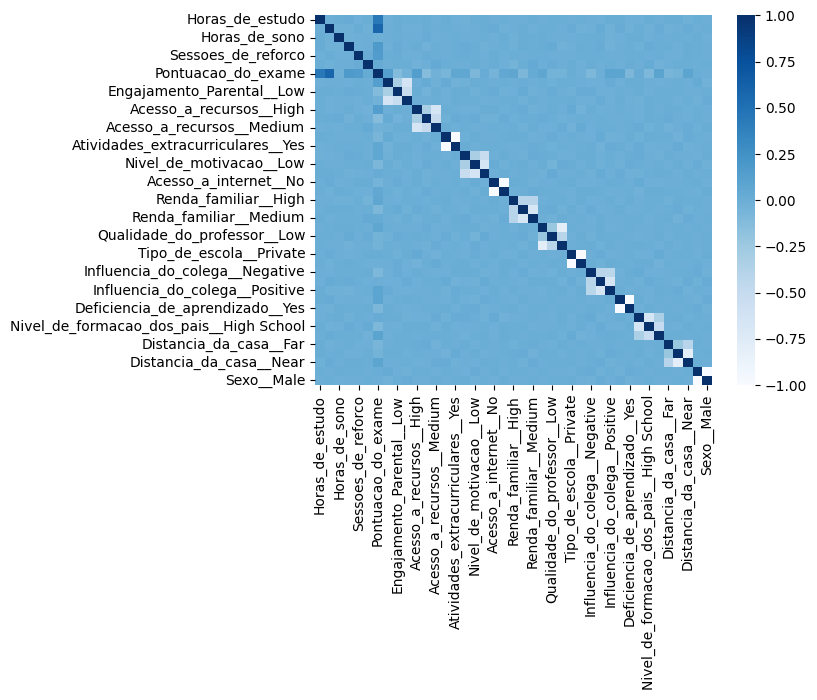

In [221]:
sns.heatmap(base.corr(),cmap='Blues')

In [222]:
y = base['Pontuacao_do_exame']
x1 = base['Horas_de_estudo']

In [223]:
x1_treinamento, x1_teste, y_treinamento, y_teste = train_test_split(x1, y, test_size = 0.3,random_state=0)

In [224]:
x1_treinamento = x1_treinamento.values.reshape(-1,1)
x1_teste = x1_teste.values.reshape(-1,1)

In [225]:
x1_teste.shape

(1914, 1)

In [226]:
x1_treinamento.shape

(4464, 1)

In [227]:
y_treinamento.shape

(4464,)

In [228]:
x1_teste

array([[14],
       [ 7],
       [24],
       ...,
       [28],
       [15],
       [18]])

In [229]:
#y_treinamento = y_treinamento.values.reshape(-1,1)
#y_teste = y_teste.values.reshape(-1,1)

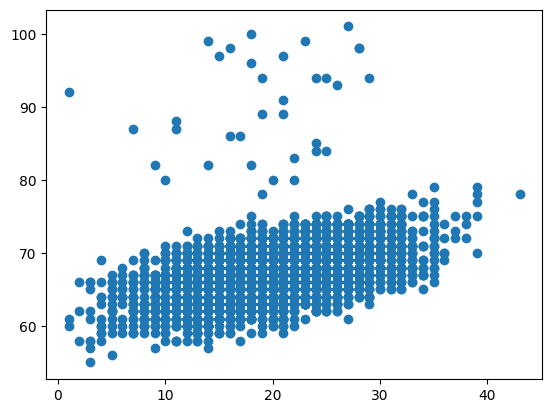

In [230]:
plt.scatter(x1_treinamento, y_treinamento)

In [231]:
regressor = LinearRegression()
regressor.fit(x1_treinamento, y_treinamento)

LinearRegression()

In [232]:
y_pred = regressor.predict(x1_teste)
print(y_pred)

print(f'Intercept: {regressor.intercept_}')
print('Coefficients: \n', regressor.coef_)
print(f'Mean absolute error: {mean_absolute_error(y_teste, y_pred):.2f}')
print(f'Coefficient of determination R2: {r2_score(y_teste, y_pred):.2f}')

[65.57183519 63.57782881 68.42041573 ... 69.55984795 65.85669324
 66.71126741]
Intercept: 61.58382243225822
Coefficients: 
 [0.28485805]
Mean absolute error: 2.47
Coefficient of determination R2: 0.23


##Testando o Modelo de Regressão Simples

In [233]:

horas = {'Horas_de_estudo': 40}

df_horas = pd.DataFrame(data = horas, index=[0])

pontuacaoexame = regressor.predict(df_horas)
print(f'A pontuação do exame foi de {pontuacaoexame[0]}')

A pontuação do exame foi de 72.97814459797102


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


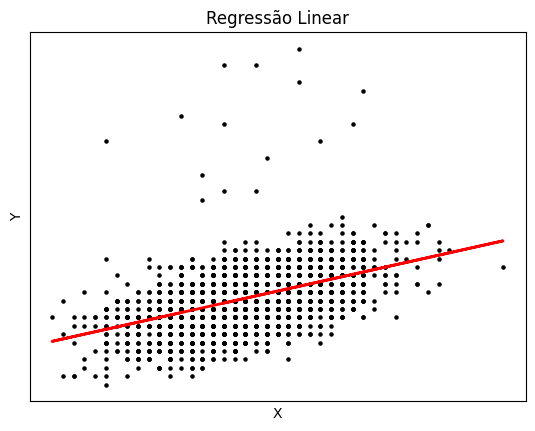

In [234]:
plt.scatter(x1_teste, y_teste, s =5, color="black")
plt.plot(x1_teste, y_pred, color="red", linewidth=2)

plt.xticks(())
plt.yticks(())
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regressão Linear')

plt.show()

##Fazendo a Regressão Múltipla

<Axes: >

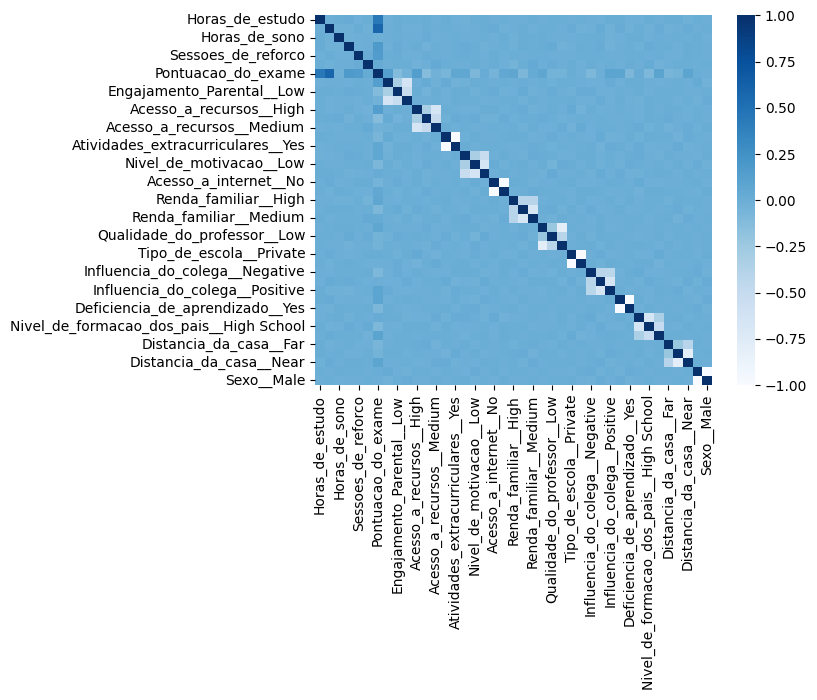

In [235]:
sns.heatmap(base.corr(),cmap='Blues')

In [236]:
base.columns

Index(['Horas_de_estudo', 'Presenca', 'Horas_de_sono', 'Pontuacoes_anteriores',
       'Sessoes_de_reforco', 'Atividade_fisica', 'Pontuacao_do_exame',
       'Engajamento_Parental__High', 'Engajamento_Parental__Low',
       'Engajamento_Parental__Medium', 'Acesso_a_recursos__High',
       'Acesso_a_recursos__Low', 'Acesso_a_recursos__Medium',
       'Atividades_extracurriculares__No', 'Atividades_extracurriculares__Yes',
       'Nivel_de_motivacao__High', 'Nivel_de_motivacao__Low',
       'Nivel_de_motivacao__Medium', 'Acesso_a_internet__No',
       'Acesso_a_internet__Yes', 'Renda_familiar__High', 'Renda_familiar__Low',
       'Renda_familiar__Medium', 'Qualidade_do_professor__High',
       'Qualidade_do_professor__Low', 'Qualidade_do_professor__Medium',
       'Tipo_de_escola__Private', 'Tipo_de_escola__Public',
       'Influencia_do_colega__Negative', 'Influencia_do_colega__Neutral',
       'Influencia_do_colega__Positive', 'Deficiencia_de_aprendizado__No',
       'Deficiencia_de_ap

In [237]:
X = base.drop(columns=['Pontuacao_do_exame'])
y = base['Pontuacao_do_exame']

In [238]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.3, random_state=0)

In [239]:
regressor2 = LinearRegression()
regressor2.fit(X_treinamento, y_treinamento)

LinearRegression()

In [242]:
pontuacao = regressor2.predict(X_teste)

print(f'Intercept: {regressor2.intercept_}')
print('Coefficients: \n', regressor2.coef_)
print(f'Mean absolute error: {mean_absolute_error(y_teste, pontuacao):.2f}')
print(f'Coefficient of determination R2: {r2_score(y_teste, pontuacao):.2f}')

Intercept: 117398119917.04427
Coefficients: 
 [ 2.92651622e-01  1.99404626e-01 -1.77273760e-02  5.12550132e-02
  5.13121674e-01  1.58874981e-01 -3.98114036e+10 -3.98114036e+10
 -3.98114036e+10  4.45431149e+10  4.45431149e+10  4.45431149e+10
  6.14328621e+10  6.14328621e+10 -9.72793098e+09 -9.72793099e+09
 -9.72793099e+09  1.39502071e+10  1.39502071e+10 -2.23180432e+11
 -2.23180432e+11 -2.23180432e+11 -2.27112387e+09 -2.27112388e+09
 -2.27112388e+09 -7.50561237e+09 -7.50561237e+09  4.42072261e+09
  4.42072261e+09  4.42072261e+09  8.73256634e+08  8.73256633e+08
 -2.48598621e+10 -2.48598621e+10 -2.48598621e+10  6.46694665e+10
  6.46694665e+10  6.46694665e+10  6.86147760e+07  6.86147760e+07]
Mean absolute error: 0.48
Coefficient of determination R2: 0.74


##Testando o Modelo da Regressão Múltipla


In [241]:
X_1 = {
'Horas_de_estudo':25 ,
'Presenca':75 ,
'Horas_de_sono':6 ,
'Pontuacoes_anteriores':87 ,
'Sessoes_de_reforco':2 ,
'Atividade_fisica':3 ,
'Engajamento_Parental__High':1 ,
'Engajamento_Parental__Low':0 ,
'Engajamento_Parental__Medium':0 ,
'Acesso_a_recursos__High':0 ,
'Acesso_a_recursos__Low':0 ,
'Acesso_a_recursos__Medium':1 ,
'Atividades_extracurriculares__No':0 ,
'Atividades_extracurriculares__Yes':1 ,
'Nivel_de_motivacao__High':0 ,
'Nivel_de_motivacao__Low':1 ,
'Nivel_de_motivacao__Medium':0 ,
'Acesso_a_internet__No':0 ,
'Acesso_a_internet__Yes':1 ,
'Renda_familiar__High':0 ,
'Renda_familiar__Low':0 ,
'Renda_familiar__Medium':1 ,
'Qualidade_do_professor__High':1 ,
'Qualidade_do_professor__Low':0 ,
'Qualidade_do_professor__Medium':0 ,
'Tipo_de_escola__Private':1 ,
'Tipo_de_escola__Public':0 ,
'Influencia_do_colega__Negative':0 ,
'Influencia_do_colega__Neutral':0 ,
'Influencia_do_colega__Positive':1 ,
'Deficiencia_de_aprendizado__No':0 ,
'Deficiencia_de_aprendizado__Yes':1 ,
'Nivel_de_formacao_dos_pais__College':1 ,
'Nivel_de_formacao_dos_pais__High School':0 ,
'Nivel_de_formacao_dos_pais__Postgraduate':0 ,
'Distancia_da_casa__Far':0 ,
'Distancia_da_casa__Moderate':1 ,
'Distancia_da_casa__Near':0 ,
'Sexo__Female':0 ,
'Sexo__Male':1 ,
}

df_X = pd.DataFrame(data = X_1, index=[0])

pontuacao = regressor2.predict(df_X)
print(f'A Pontuação do exame é {pontuacao[0]:.2f}')

A Pontuação do exame é 69.23
